In [2]:
# Numerical libraries
import numpy as np   
from scipy import stats

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [4]:
# reading the CSV file into pandas dataframe
Airfare_df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',
            header=None, sep='\s+',)

In [5]:
# reading the CSV file into pandas dataframe and adding relevant columns. Market leading Airline is defined as MLA and Low price Airline is defined as LPA
dfairfare = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat', header=None, sep='\s+',)


In [6]:
dfairfare.columns = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 'market share MLA', 'Average fare MLA', 'Low price airline', 'market share LPA', 'price LPA']

# Q1 > Import and store the data in a data frame.

In [7]:
dfairfare

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share MLA,Average fare MLA,Low price airline,market share LPA,price LPA
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# Q2  > Remove the outliers from the data


In [8]:
dfairfare.describe()

,Average Fare,Distance,Average weekly passengers,market share MLA,Average fare MLA,market share LPA,price LPA
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [9]:
Q1, Q2, Q3 = np.percentile(dfairfare['Average Fare'],[25,50,75])

In [10]:
IQR = Q3 - Q1

In [11]:
IQR

71.41749999999999

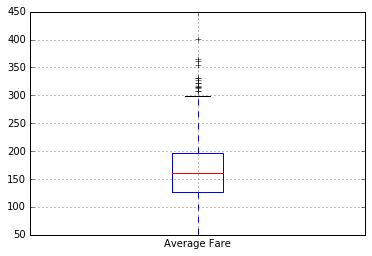

In [12]:
dfairfare.boxplot(column = 'Average Fare')

In [13]:
lower_bound= Q1 - 1.5 * IQR
lower_bound

18.84875000000001

In [14]:
upper_bound= Q3 + 1.5 * IQR
upper_bound

304.51874999999995

In [15]:
dfairfare = dfairfare[(np.abs(stats.zscore(dfairfare.select_dtypes(exclude='object'))) < 3).all(axis=1)]

In [16]:
dfairfare.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share MLA             float64
Average fare MLA             float64
Low price airline             object
market share LPA             float64
price LPA                    float64
dtype: object

In [17]:
dfairfare

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share MLA,Average fare MLA,Low price airline,market share LPA,price LPA
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# Q3 > Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [18]:
# Copy all the predictor variables into X dataframe. Since 'Average Fare' is dependent variable drop it
X = dfairfare.drop(['Average Fare', 'City1', 'City2', 'market leading airline', 'Low price airline'], axis=1)

# Copy the 'Average Fare' column alone into the y dataframe. This is the dependent variable
y = dfairfare[['Average Fare']]



# Q4 > Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
dfairfare[dfairfare.isnull().any(axis=1)]

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share MLA,Average fare MLA,Low price airline,market share LPA,price LPA


In [24]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0022408775750568507
The coefficient for Average weekly passengers is -0.0020303639910966855
The coefficient for market share MLA is 0.06174761328905435
The coefficient for Average fare MLA is 0.7505123110644336
The coefficient for market share LPA is -0.029525930322241423
The coefficient for price LPA is 0.19918728597834628


In [29]:
# Drop the independent variables which has less than 0.1 correlation
X1 = dfairfare.drop(['Average Fare', 'City1', 'City2', 'market leading airline', 'Low price airline', 'Distance', 'Average weekly passengers', 'market share MLA', 'market share LPA'], axis=1)

In [30]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=1)

In [31]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#the coefficients for each of the independent attributes after excluding < 0.1 Correlation

for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Average fare MLA is 0.7708580959850124
The coefficient for price LPA is 0.19672233204993905


# Q5 Create scatter Plot of Independent Variable vs Dependent Variable.

In [257]:
dfairfare_attr = dfairfare.iloc[:, 0:10]

C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


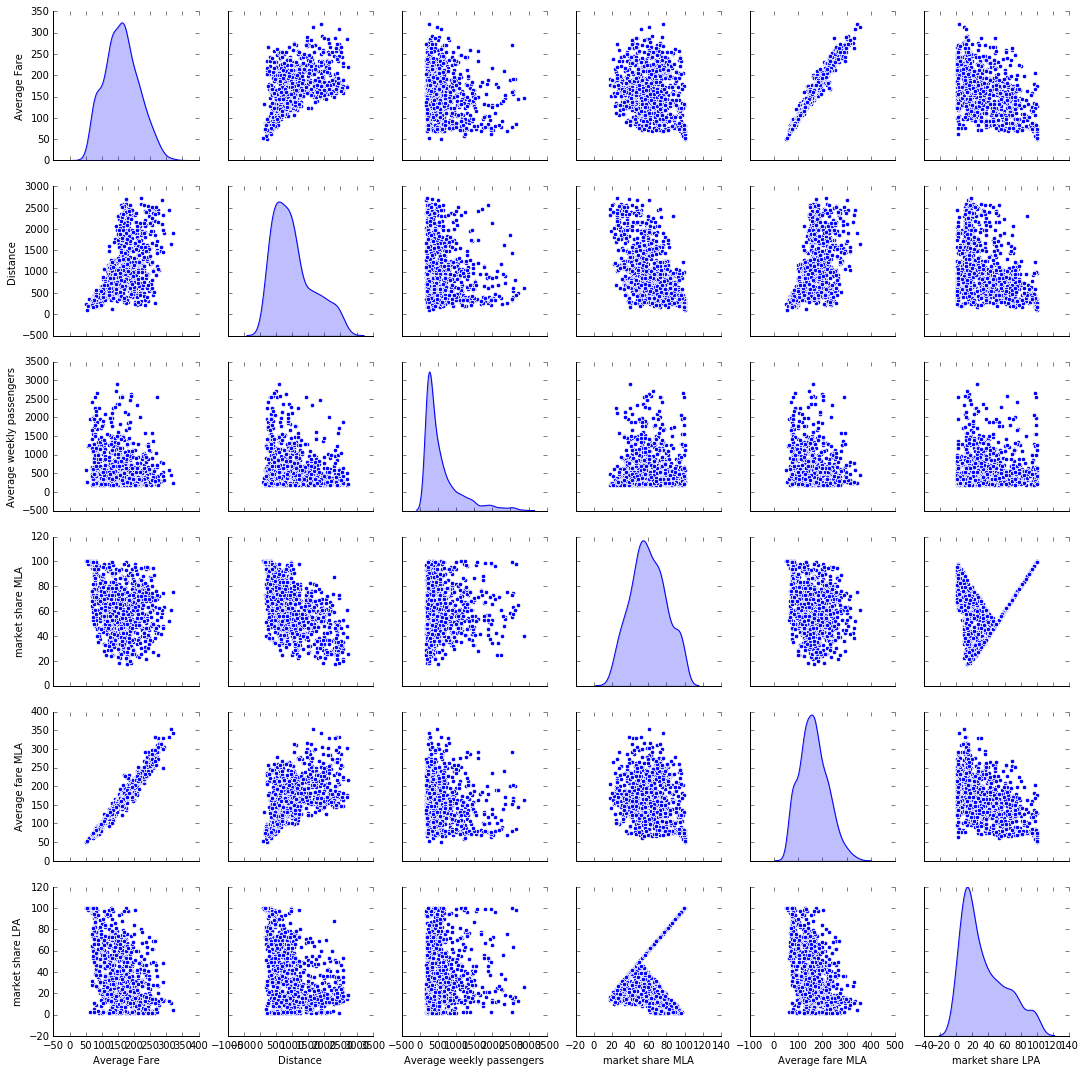

In [258]:
sns.pairplot(dfairfare_attr, diag_kind='kde')

# Q6 Divide the data set into training and test data set and build a Multiple Linear Regression model

# Q7 Print the coefficients & intercepts of the linear regression model

# Q8 Print the accuracy of the overall model

In [33]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=1)

In [39]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
intercept = regression_model.intercept_[0]

In [40]:
#the coefficients for each of the independent attributes after excluding < 0.1 Correlation

for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Average fare MLA is 0.7708580959850124
The coefficient for price LPA is 0.19672233204993905


In [41]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.241321699376385


In [42]:
regression_model.score(X1_train, y_train)

0.9740358853608688